In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

# Multi Population Model

For this problem we will walk through the process of solving a multi population model, through differential equations. The model we will consider is

\begin{align}
\frac{dP}{dt}&=0.3P\left(1-\frac{P}{100}\right)-0.06PR\\
\frac{dR}{dt}&=-0.4R+0.01PR
\end{align}

## Equilibrium Solutions

The first step for solving this is to find all of the equilibrium solutions of the system of differential equations.

\begin{align}
P(0.3-0.003P-0.06R)\quad R(-0.4+0.01P)\\
\end{align}

Then solving for equilibrium points we can find them to be
\begin{align}
P=0&,R=0\\
P=40&,R=3\\
P=100&,R=0
\end{align}

## Linearization at Equilibrium Points

We now need to find the linearization at the equilibrium solutions. In order to do this we first must find the the partial derivatives the the system of equations.

We construct the notation

$$\frac{dP}{dt}=f\quad\frac{dR}{dt}=g$$

\begin{align}
\frac{df}{dP}&=0.3-0.006P-0.06R\\
\frac{df}{dR}&=-0.06P\\
\frac{dg}{dP}&=0.01R\\
\frac{dg}{dR}&=-0.4+0.01P
\end{align}

Then we construct the matrix of the derivatives at the equilibrium points. Then finding the eigenvalues and eigenvectors for that matrix provides us with the linearized solution to the system of equations. Where the matrix is given by

$$
\begin{pmatrix}
\frac{df}{dP} & \frac{df}{dR}\\
\frac{dg}{dP} & \frac{dg}{dR}
\end{pmatrix}
$$

Then the linearization at the equilibrium point is given by
$$
F_{eq}=V_1e^{\lambda_1t}+V_2e^{\lambda_2t}
$$

To handle this numericaly we can use numpy to solve for the eigen vectors and the eigenvalues.

```python3
np.linalg.eig(matrix)
```

This returns 

### At (0,0)

$$
\begin{pmatrix}
0.3 & 0\\
0 & -0.4
\end{pmatrix}\implies\lambda_1=-\frac{2}{5},\quad\lambda_2=\frac{3}{10}\\
V_1=\begin{pmatrix}0\\1\end{pmatrix},\quad V_2=\begin{pmatrix}1\\0\end{pmatrix}\\
F_{(0,0)}=\begin{pmatrix}0\\1\end{pmatrix}e^{-\frac{2}{5}t}+\begin{pmatrix}1\\0\end{pmatrix}e^{\frac{3}{10}t}
$$

In [23]:
np.linalg.eig([[0.3, 0], [0,-0.4]])

(array([ 0.3, -0.4]), array([[1., 0.],
        [0., 1.]]))

### At (100,0)

$$
\begin{pmatrix}
-0.3 & -6.0\\
0 & 0.6
\end{pmatrix}\implies\lambda_1=\frac{3}{5},\quad\lambda_2=-\frac{3}{10}\\
V_1=\begin{pmatrix}-\frac{20}{3}\\1\end{pmatrix},\quad V_2=\begin{pmatrix}1\\0\end{pmatrix}\\
F_{(100,0)}=\begin{pmatrix}-\frac{20}{3}\\1\end{pmatrix}e^{\frac{3}{5}t}+\begin{pmatrix}1\\0\end{pmatrix}e^{-\frac{3}{10}t}
$$

In [24]:
np.linalg.eig([[-0.3,-6.0],[0,0.6]])

(array([-0.3,  0.6]), array([[ 1.        , -0.98893635],
        [ 0.        ,  0.14834045]]))

### At (40,3)

$$
\begin{pmatrix}
-0.12 & -2.4\\
0.03 & 0.0
\end{pmatrix}\implies\lambda_1=\frac{1}{50}\left(-3+3\sqrt{19}i\right),\quad\lambda_2=\frac{1}{50}\left(-3-3\sqrt{19}i\right)\\
Re(\lambda_1) < 0\ \text{and}\ Re(\lambda_2) <0 \implies \text{spiral sink}
$$

In [25]:
np.linalg.eig([[-0.12, -2.4],[0.03,0.0]])

(array([-0.06+0.26153394j, -0.06-0.26153394j]),
 array([[ 0.99380799+0.j        ,  0.99380799-0.j        ],
        [-0.0248452 -0.10829771j, -0.0248452 +0.10829771j]]))

## Numerical Solution

The linearization is useful for finding a general format of the solution, but the a more specific solution, we must use numerical methods for finding the solution. The method that we will use is called *Euler-Cromer*. Euler-Cromer is a method for approximating the solution to a differential equation numericaly (Note that most proctical implementations utilize a more advanced method called Runge-Kutta).

In [26]:
def euler(fa, fb, init_a, init_b, start_t, end_t, steps=100):
    step_size = np.abs(end_t - start_t) / steps
    a = init_a
    b = init_b
    A = []
    B = []
    T = np.linspace(a, b, steps)
    for t in T:
        A.append(a)
        B.append(b)
        a += (step_size * fa(A[-1], B[-1], t))
        b += (step_size * fb(A[-1], B[-1], t))
    return A, B, T

<IPython.core.display.Javascript object>


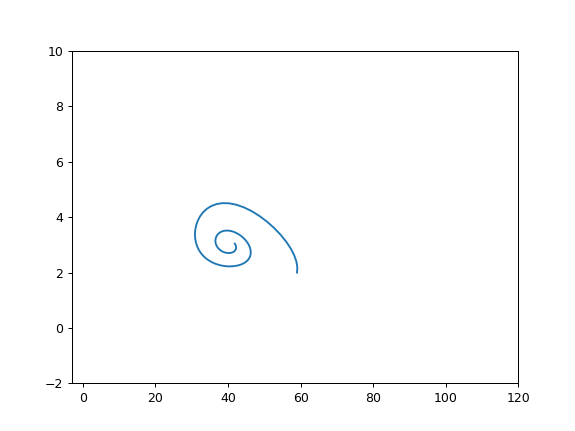

interactive(children=(FloatSlider(value=59.0, description='x', max=120.0, min=-1.0, step=0.5), FloatSlider(val…

<function __main__.update>

In [38]:
%matplotlib notebook
def fa(p,r,t):
    return 0.3*p*(1-p/100.0)-0.06*p*r

def fb(p,r,t):
    return -0.4*r+0.01*p*r

X, Y, T = euler(fa, fb, 70, 4, 0, 50)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim(-3, 120)
plt.ylim(-2,10)
line, = ax.plot(X, Y)

def update(x,y, t):
    X, Y, T = euler(fa, fb, x, y, 0, t)
    line.set_ydata(Y)
    line.set_xdata(X)
    fig.canvas.draw()
    
interact(update, x=(-1, 120, 0.5), y=(-1,6, 0.5), t=(1, 100))

<IPython.core.display.Javascript object>


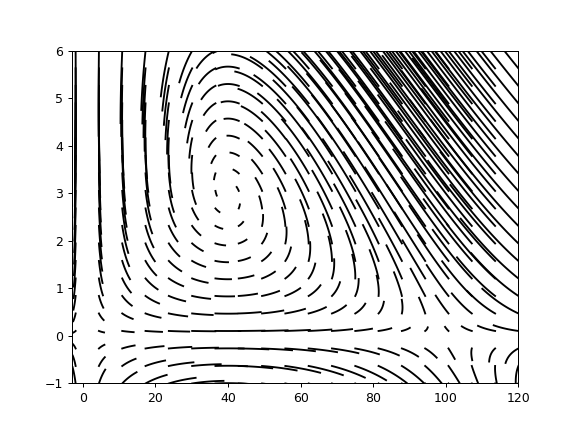

In [43]:
for x in np.linspace(-2, 120, 20):
    for y in np.linspace(-1, 6, 20):
        X, Y, T = euler(fa, fb, x, y, 0, 1)
        plt.plot(X, Y, 'k')
plt.xlim(-3,120)
plt.ylim(-1,6)
plt.show()

# Practice Problem

Now that the process you have an understanding of the process both analyticaly and numericaly, you get to do a problem on your own.